Nama  : Aida Muhdina
<br/>Email : aidamuhdina@gmail.com

In [1]:
import pandas as pd

df = pd.read_csv('/content/drive/MyDrive/Colab machine learning/Submission 1 NLP/bbc-text.csv')
df.head()

,category,text
0,tech,tv future in the hands of viewers with home th...
1,business,worldcom boss left books alone former worldc...
2,sport,tigers wary of farrell gamble leicester say ...
3,sport,yeading face newcastle in fa cup premiership s...
4,entertainment,ocean s twelve raids box office ocean s twelve...


In [2]:
category = pd.get_dummies(df.category)
df = pd.concat([df, category], axis=1)
df = df.drop(columns='category')
df

,text,business,entertainment,politics,sport,tech
0,tv future in the hands of viewers with home th...,0,0,0,0,1
1,worldcom boss left books alone former worldc...,1,0,0,0,0
2,tigers wary of farrell gamble leicester say ...,0,0,0,1,0
3,yeading face newcastle in fa cup premiership s...,0,0,0,1,0
4,ocean s twelve raids box office ocean s twelve...,0,1,0,0,0
...,...,...,...,...,...,...
2220,cars pull down us retail figures us retail sal...,1,0,0,0,0
2221,kilroy unveils immigration policy ex-chatshow ...,0,0,1,0,0
2222,rem announce new glasgow concert us band rem h...,0,1,0,0,0
2223,how political squabbles snowball it s become c...,0,0,1,0,0


In [3]:
news = df['text'].to_numpy()
label = df[['business', 'entertainment', 'politics', 'sport', 'tech']].to_numpy()

In [4]:
from sklearn.model_selection import train_test_split

news_latih, news_test, label_latih, label_test = train_test_split(news, label, test_size=0.2)

In [5]:
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences

tokenizer = Tokenizer(num_words=5000, oov_token='x')
tokenizer.fit_on_texts(news_latih)
tokenizer.fit_on_texts(news_test)

sekuens_latih = tokenizer.texts_to_sequences(news_latih)
sekuens_test = tokenizer.texts_to_sequences(news_test)

padded_latih = pad_sequences(sekuens_latih)
padded_test = pad_sequences(sekuens_test)

In [6]:
import tensorflow as tf

model = tf.keras.Sequential([
            tf.keras.layers.Embedding(input_dim=5000, output_dim=16),
            tf.keras.layers.LSTM(64),
            tf.keras.layers.Dense(64, activation='relu'),
            tf.keras.layers.Dropout(0.1),
            tf.keras.layers.Dense(5, activation='softmax')
])
model.compile(loss='categorical_crossentropy',
              optimizer='Adam',
              metrics=['accuracy'])

In [7]:
#membuat kelas callback untuk menghentikan training
class myCallback(tf.keras.callbacks.Callback):
  def on_epoch_end(self, epoch, logs={}):
    if logs.get('val_accuracy')>=0.90:
      self.model.stop_training = True
      accuracy = float(logs.get('accuracy'))*100
      val_accuracy = float(logs.get('val_accuracy'))*100
      print("reached %.2f%% accuracy and %.2f%% val_accuracy" %(accuracy, val_accuracy))

callback = myCallback()

In [8]:
num_epochs=30
history = model.fit(padded_latih, label_latih, epochs=num_epochs,
                    batch_size=128, validation_data=(padded_test, label_test),
                    verbose=2, callbacks=[callback])

Epoch 1/30
14/14 - 11s - loss: 1.6073 - accuracy: 0.2191 - val_loss: 1.6028 - val_accuracy: 0.2315
Epoch 2/30
14/14 - 3s - loss: 1.5962 - accuracy: 0.2506 - val_loss: 1.5881 - val_accuracy: 0.2315
Epoch 3/30
14/14 - 3s - loss: 1.5777 - accuracy: 0.2522 - val_loss: 1.5800 - val_accuracy: 0.3258
Epoch 4/30
14/14 - 3s - loss: 1.5425 - accuracy: 0.3983 - val_loss: 1.5284 - val_accuracy: 0.3730
Epoch 5/30
14/14 - 3s - loss: 1.3541 - accuracy: 0.4994 - val_loss: 1.1940 - val_accuracy: 0.4584
Epoch 6/30
14/14 - 3s - loss: 1.0400 - accuracy: 0.5185 - val_loss: 0.9383 - val_accuracy: 0.5865
Epoch 7/30
14/14 - 3s - loss: 0.7284 - accuracy: 0.6966 - val_loss: 0.6848 - val_accuracy: 0.7258
Epoch 8/30
14/14 - 3s - loss: 0.5699 - accuracy: 0.7927 - val_loss: 0.6743 - val_accuracy: 0.7393
Epoch 9/30
14/14 - 3s - loss: 0.4692 - accuracy: 0.8466 - val_loss: 0.7228 - val_accuracy: 0.7213
Epoch 10/30
14/14 - 3s - loss: 0.4229 - accuracy: 0.8730 - val_loss: 0.5803 - val_accuracy: 0.8000
Epoch 11/30
14/14 

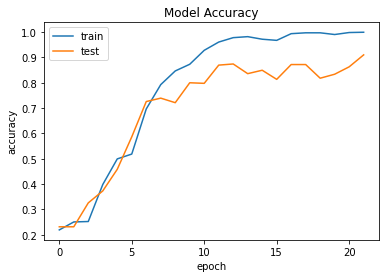

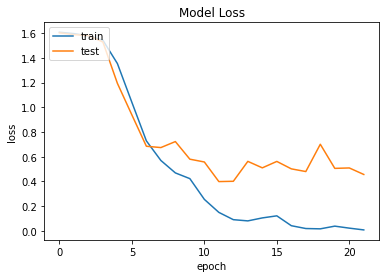

In [9]:
import matplotlib.pyplot as plt
%matplotlib inline

#plot accuracy
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model Accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

#plot loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model Loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()